In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data_banknote_authentication.csv')
x = df.drop('Class',axis=1)
y = df['Class']

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=101)

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
n_estimators = [64,100,128,200]
max_features = [2,3,4]
bootstrap = [True,False]
oob_score = [True,False]
param_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'bootstrap':bootstrap,
              'oob_score':oob_score}

grid = GridSearchCV(rfc,param_grid)
grid.fit(x_train,y_train)

D:\Anaconda3\envs\data\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
D:\Anaconda3\envs\data\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
D:\Anaconda3\envs\data\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
D:\Anaconda3\envs\data\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
D:\Anaconda3\envs\data\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
D:\Anaconda3\envs\data\lib\site-packages\sklearn\base.py:445: UserWarn

D:\Anaconda3\envs\data\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
D:\Anaconda3\envs\data\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
D:\Anaconda3\envs\data\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
D:\Anaconda3\envs\data\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
D:\Anaconda3\envs\data\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
D:\Anaconda3\envs\data\lib\site-packages\sklearn\base.py:445: UserWarn

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [10]:
grid.best_params_

{'bootstrap': True, 'max_features': 3, 'n_estimators': 64, 'oob_score': False}

In [18]:
rfc = RandomForestClassifier(n_estimators=64,bootstrap=True,max_features=3,oob_score=True)
rfc.fit(x_train,y_train)

D:\Anaconda3\envs\data\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


RandomForestClassifier(max_features=3, n_estimators=64, oob_score=True)

In [19]:
rfc.oob_score_

0.9959481361426256

In [33]:
prediction = rfc.predict(x_test)

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        89
           1       0.98      1.00      0.99        49

    accuracy                           0.99       138
   macro avg       0.99      0.99      0.99       138
weighted avg       0.99      0.99      0.99       138



In [40]:
errors =[]
misclassifications = []

for n in range(1,200):
    rfc = RandomForestClassifier(n_estimators=n, max_features=3)
    rfc.fit(x_train,y_train)
    preds = rfc.predict(x_test)
    err = 1-accuracy_score(y_test,preds)
    n_missed = np.sum(preds != y_test)
    errors.append(err)
    misclassifications.append(n_missed)

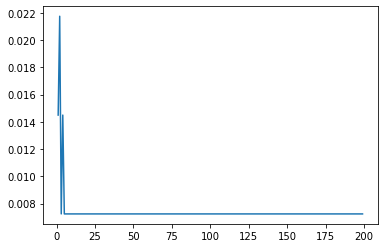

In [41]:
plt.plot(range(1,200),errors)

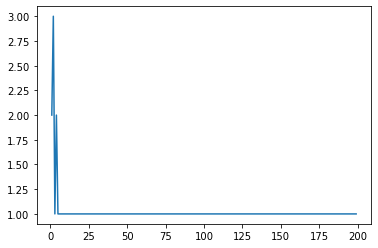

In [42]:
plt.plot(range(1,200),misclassifications)